# Directed Search with Incomplete Information: 
# Small-Difference Wage Equilibrium with Y1 > Y2

## A solution to 2020W2 UBCV Econ 514 Pset 2 Q3

James Yu, 21 February 2021

This notebook revises a series of procedures from multiple past notebooks which can all be found at [this GitHub repo](https://github.com/jbrightuniverse/Directed-Search-Small-Difference-Wage-Equilibrium/). New procedures are also introduced.

It also formulates a solution for problem 3 of [this assignment](https://montoya.econ.ubc.ca/Econ514/problem_set_2.pdf).

[This other notebook](https://github.com/michaelpetersubc/notebooks/blob/master/Econ306/directed_search/directed_search_incomplete_information.ipynb) by Dr. Michael Peters, which we shall refer to hereafter as "the original notebook", describes the full extent of the solution for the Nash equilibrium $\pi_H$ and $\pi_L$ which is revised and re-implemented here.

## Background

Econ 514 Pset2 Q3 asks to prove that, in the directed search model with incomplete information where $Y_1 > Y_2$, any existent equilibrium in wages will satisfy $w_1 > w_2$ and $w_1 \frac{\lambda}{2} + w_1(1-\lambda) \leq w_2$. Let this be known as the hypothesis. It turns out that this is not true for all combinations of $Y_1$ and $Y_2$, and also not true for all $\lambda$. We prove this, as well as what the valid regions are, in this notebook.

For much of the notebook, we will refer to $\lambda$ as $\gamma$ in order to avoid a Python function name conflict.

Thus, we begin the proof:

## The Proof

Consider a setup of the model with an arbitrary choice of $\gamma \in [0, 1]$, $Y_1$ and $Y_2$ such that $Y_1 > Y_2$.

First, we establish our solution for $\pi_H$ and $\pi_L$, which at the time of writing is not equal to the solution given in the original notebook due to a number of errors. Thus, we define them as follows:

$$
\pi_H = \begin{cases} 
      1 & w_1 (1-0.5\gamma) > w_2 \\
      \frac{w_2(\gamma-2) + 2w_1}{\gamma(w_1+w_2)} & \text{otherwise} 
   \end{cases}
$$


$$
\pi_L = \begin{cases} 
      \text{min}(1, \frac{2(\gamma-1)w_1 + (\gamma + 1)w_2}{(\gamma-1)(w_1+w_2)}) & w_1 (1-0.5\gamma) > w_2 \\
      \text{max}(0, \frac{(3-\gamma)w_2 - 2w_1}{(1-\gamma)(w_1+w_2)}) & \text{otherwise} 
   \end{cases}
$$

Credit to Dr. Peters for providing the revised equations.

Observe immediately that $1-0.5\gamma$ takes on values from 1 to 0.5. This means that when $w_1 = w_2$, we will always be able to apply the second cases of $\pi_H$ and $\pi_L$ as $w_1(1-0.5\gamma) \leq w_1$.

Additionally, when $w_2 = w_1(1-0.5\gamma)$, we can also apply the second cases.

This means that over the region we are looking for equilibria in, the second cases will always apply.

Thus, if we can prove that, given the second cases of $\pi_H$ and $\pi_L$, the equilibrium must lie between these lines, we are done. 

In order for an equilibrium to exist outside, the first case of $\pi_H$ and $\pi_L$ would have to apply, which means if we show there is no equilibrium in this region given the second cases, we can outright stop checking the values which led to the result and move on because for those particular parameters, the hypothesis is already wrong.

We will use the following technique to verify the location of a potential equilibrium point. Given the profit functions for firm 1 and firm 2 evaluated using the second cases of $\pi_H$ and $\pi_L$, we take the derivatives with respect to $w_1$ and $w_2$, respectively. We then evaluate these derivatives at the $w_1 = w_2$ line and the $w_2 = w_1(1-0.5\gamma)$ line.

If it turns out that one of these derivatives is weakly negative, and the other one is weakly positive, by the Intermediate Value Theorem, the profit function must attain a maximum somewhere in between as the derivative must hit zero somewhere in between. We can confirm it would be a maximum by checking if the second derivatives are negative, but as previous work from previous notebooks indicated we are indeed dealing with maxima at critical points, we assume the same continues to apply as we are in fact using the same profit functions.

Also, in order to use this, it must be the case that each derivative is continuous. With respect to wages, the only points where the functions are undefined are where $w_1$ or $w_2$ may be zero in the denominator. As this already is a separate case, and this is not an equilibrium we care about, we can ignore it as we can even instead take the limit as the wage approaches zero and still achieve continuity. Thus, for our purposes, we indeed have continuous derivatives. Thus, we proceed.

It should be noted that a large part of the following calculations can be entirely skipped because of a result found in one of the later cases. We include all the work that was completed for reference.

Also, the majority of the code here is written in pure Python in order to take advantage of Matplotlib. Later in the notebook, a small tangent to a SageMath notebook will be necessary for more powerful symbolic computing.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

First, we check the upper bound at $w_1 = w_2$. If our hypothesis is true, we expect the derivative of both profit functions to be nonpositive, as there should be a maximum somewhat below this line.

Note that for $\pi_L$, the point at which the unbounded version of the second case hits zero is where $(3-\gamma)w_2 = 2w_1$, or $w_2 = \frac{2w_1}{3-\gamma}$. Since we are checking $w_1 = w_2$, we are always weakly above this line, and so we can use the unbounded version of the second case without bounding it to zero.

In [2]:
w_1, w_2, gamma, Y1, Y2 = symbols("w_1 w_2 gamma Y1 Y2")

pi_H = ((gamma-2)*w_2 + 2*w_1)/(gamma*(w_1+w_2))
pi_L = ((3-gamma)*w_2 - 2*w_1)/((1-gamma)*(w_1+w_2))
profit_1 = (Y1 - w_1)*(1-((gamma**2 *(1-pi_H)**2) + ((1-gamma)**2 *(1-pi_L)**2) + (2*gamma*(1-gamma)*(1-pi_H)*(1-pi_L))))
dprofit_1 = diff(profit_1, w_1)
simplify(dprofit_1.subs(w_2, w_1))

-(Y1 + 2*w_1)/(4*w_1)

$w_1 \geq 0$ so the denominator is positive. Thus, we need the numerator to be positive so the negative sign makes the derivative nonpositive. This is always true since $Y_1 \geq 0$ and $w_1 \geq 0$, so we are done with this case.

Next, we check firm 2.

In [3]:
profit_2 = (Y2 - w_2)*(1-(gamma**2 * pi_H**2) + ((1-gamma)**2 * pi_L**2) + (2*gamma*(1-gamma)*pi_H*pi_L))
dprofit_2 = diff(profit_2, w_2)
var = simplify(dprofit_2.subs(w_1, w_2))
simplify(var)

(-2*Y2*gamma**2 + 8*Y2*gamma + Y2 + 2*w_2*(2*gamma**2 - 4*gamma - 3))/(4*w_2)

In [4]:
expr = fraction(simplify(var))[0]
expr

-2*Y2*gamma**2 + 8*Y2*gamma + Y2 + 2*w_2*(2*gamma**2 - 4*gamma - 3)

We wish to see where this is nonpositive.

In [5]:
diff(expr, w_2)

4*gamma**2 - 8*gamma - 6

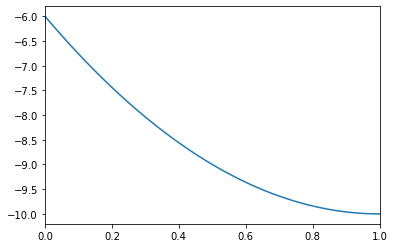

In [6]:
fig, ax = plt.subplots()
mapper = lambdify(gamma, diff(expr, w_2), modules = ['numpy'])
gams = np.linspace(0, 1, 100)
vals = mapper(gams)
ax.set_xlim([0, 1])
plt.plot(gams, vals)
plt.show()

Clearly this is always negative so the derivative of the profit function is always decreasing in $w_2$. Let's figure out what it is valued at when $w_2 = 0$.

In [7]:
expr.subs(w_2, 0)

-2*Y2*gamma**2 + 8*Y2*gamma + Y2

Big warning: if $\gamma = 0$, this is positive, which is not what we want. We must find an inequality for this being less than or equal to zero, so lets set it equal to zero. We know it'll be zero when $Y_2 = 0$, but lets check it when $Y_2 > 0$.

In [8]:
solve(expr.subs(w_2, 0), gamma)

[2 - 3*sqrt(2)/2, 2 + 3*sqrt(2)/2]

In [9]:
import math
print(2 - 3*math.sqrt(2)/2)
print(2 + 3*math.sqrt(2)/2)

-0.12132034355964283
4.121320343559643


One of those values of gamma is negative, and the other is positive but entirely out of range.

In [10]:
expr.subs(w_2, 0).subs(gamma, 1)

7*Y2

This means no matter what gamma we use, it will always be positive at $w_2 = 0$. We must therefore find the $w_2$ where this stops happening.

In [11]:
expr

-2*Y2*gamma**2 + 8*Y2*gamma + Y2 + 2*w_2*(2*gamma**2 - 4*gamma - 3)

In [12]:
expr.subs(gamma, 0)

Y2 - 6*w_2

When $\gamma$ is zero, we have this. For this to be nonpositive, we must have $6w_2 \geq Y_2$.

In [13]:
expr.subs(gamma, 1)

7*Y2 - 10*w_2

When $\gamma$ is one, we need $1.43w_2 \geq Y_2$.

In [14]:
expr.subs(gamma, 0.5)

4.5*Y2 - 9.0*w_2

This one needs $2w_2 \geq Y_2$.

As we increase $\gamma$, the coefficient of $Y_2$ increases. Note the following:

In [15]:
diff(-2*Y2*gamma**2 + 8*Y2*gamma + Y2, gamma)

-4*Y2*gamma + 8*Y2

This is $4Y_2(2-\gamma)$ which is always positive so the coefficient is increasing in $\gamma$. Also:

In [16]:
diff(2*w_2*(2*gamma**2-4*gamma-3), gamma)

2*w_2*(4*gamma - 4)

This is always nonpositive so the coefficient of $w_2$ is decreasing in $\gamma$. This means we have a continuously decreasing coefficient for $w_2$ in our inequality bound for where we see the original profit function derivative satisfy our hypothesis.

In [17]:
simplify(expand(solve(expr, w_2)[0]))

Y2*(2*gamma*(4 - gamma) + 1)/(2*(-2*gamma**2 + 4*gamma + 3))

Ultimately, this is the full bound by which setting $w_2$ to it makes the derivative zero. To satisfy our hypothesis, $w_2$ must be greater or equal to this number.

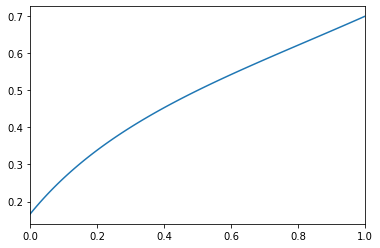

In [18]:
fig, ax = plt.subplots()
expr2 = diff(simplify(expand(solve(expr, w_2)[0])), Y2)
mapper = lambdify(gamma, expr2, modules = ['numpy'])
gams = np.linspace(0, 1, 100)
vals = mapper(gams)
ax.set_xlim([0, 1])
plt.plot(gams, vals)
plt.show()

What this means is that as $\gamma$ increases, the coefficient of $Y_2$ in our inequality increases like this. This means that as $\gamma$ gets higher, if we keep $Y_2$ the same, we have to let $w_2$ be larger to compensate.

Ultimately what all of this means is that the $w_1 = w_2$ line is only a suboptimal solution if $w_2$ is larger than a specific fraction of $Y_2$.

Now that we've done all that, lets move to the other boundary where $w_2 = w_1(1-0.5\gamma)$. Recall there are two cases for $\pi_L$. These cases depend on the value of $\gamma$ as plotting in Desmos and Matplotlib showed there is a specific value of $\gamma$ at which the lower bound constraint on $\pi_L$ starts kicking in for increasing $\gamma$. Lets start with the case where the value is small.

In [19]:
newexp = simplify(dprofit_1.subs(w_2, w_1 * (1-0.5*gamma)))
newexp

(-0.0078125*Y1*gamma + 0.015625*Y1 - 0.0009765625*gamma**3*w_1 + 0.01171875*gamma**2*w_1 - 0.03515625*gamma*w_1 + 0.03125*w_1)/(w_1*(0.0009765625*gamma**3 - 0.01171875*gamma**2 + 0.046875*gamma - 0.0625))

At this boundary, we expect the derivative to be nonnegative, as we are at the opposite end of our candidate region. Therefore, we must figure out where this derivative is nonnegative.

In [20]:
fraction(newexp)[1]

w_1*(0.0009765625*gamma**3 - 0.01171875*gamma**2 + 0.046875*gamma - 0.0625)

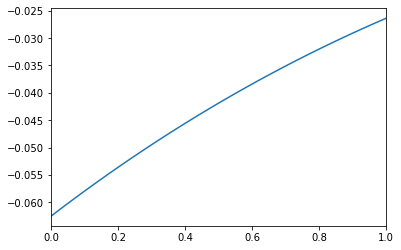

In [21]:
fig, ax = plt.subplots()
exprb = diff(fraction(newexp)[1], w_1)
mapper = lambdify(gamma, exprb, modules = ['numpy'])
gams = np.linspace(0, 1, 100)
vals = mapper(gams)
ax.set_xlim([0, 1])
plt.plot(gams, vals)
plt.show()

We see the denominator is always negative, so to achieve weak positivity, the numerator must also be weakly negative.

In [22]:
fraction(newexp)[0]

-0.0078125*Y1*gamma + 0.015625*Y1 - 0.0009765625*gamma**3*w_1 + 0.01171875*gamma**2*w_1 - 0.03515625*gamma*w_1 + 0.03125*w_1

In [23]:
fraction(newexp)[0].subs(gamma, 0)

0.015625*Y1 + 0.03125*w_1

In [24]:
fraction(newexp)[0].subs(gamma, 1)

0.0078125*Y1 + 0.0068359375*w_1

This appears to not happen at all. Offpage testing showed that at the very least, this line was less negative than the upper bound, meaning our optimal solution, if it exists, would have to be located even further below this line. This means when $\gamma$ is small, we may not actually have a solution.

[This notebook](https://github.com/jbrightuniverse/Directed-Search-Small-Difference-Wage-Equilibrium/blob/main/Trial4.ipynb), when $Y_2$ is modified to be smaller than $Y_1$, and when the first case of $\pi_H$ and $\pi_L$ are applied, seem to indicate an equilibrium may exist outside of the region we are looking for. However, as this is not the condition we want in the problem, we ignore it.

If true, doing the same for firm 2 won't make a solution exist, so lets skip to the large $\gamma$ condition.

In [25]:
w_1, w_2, gamma, Y1, Y2 = symbols("w_1 w_2 gamma Y1 Y2")

pi_H = ((gamma-2)*w_2 + 2*w_1)/(gamma*(w_1+w_2))
pi_L = 0
profit_1 = (Y1 - w_1)*(1-((gamma**2 *(1-pi_H)**2) + ((1-gamma)**2 *(1-pi_L)**2) + (2*gamma*(1-gamma)*(1-pi_H)*(1-pi_L))))
dprofit_1 = diff(profit_1, w_1)
myexp = simplify(dprofit_1.subs(w_2, w_1 * (1-0.5*gamma)))
myexp

(-0.001953125*Y1*gamma**2 + 0.005859375*Y1*gamma - 0.00390625*Y1 + 0.00048828125*gamma**3*w_1 - 0.0009765625*gamma**2*w_1 - 0.001953125*gamma*w_1 + 0.00390625*w_1)/(w_1*(0.00048828125*gamma - 0.001953125))

So we want to find out where this might be nonnegative. Let's try some values of $\gamma$.

In [26]:
simplify(myexp.subs(gamma, 0))

2.0*Y1/w_1 - 2.0

This isn't large $\gamma$, but we can still look at it. This is nonnegative where $2Y_1 \geq 2w_1$, or $Y_1 \geq w_1$, which we always have. Bingo.

In [27]:
simplify(myexp.subs(gamma, 1))

-1.00000000000000

This is not what we wanted. Its also more negative than the upper bound, meaning the optimal solution would be above the upper bound.

In [28]:
simplify(myexp.subs(gamma, 0.5))

0.857142857142857*Y1/w_1 - 1.60714285714286

For this to work, we need $0.857142857142857Y_1 \geq 1.60714285714286w_1$, or $Y_1 \geq 1.875w_1$.

In [29]:
simplify(myexp.subs(gamma, 0.9))

0.141935483870968*Y1/w_1 - 1.13193548387097

This one is $Y_1 \geq 7.975w_1$. Without doing the calculations, it is obvious that as $\gamma$ approaches 1, the likelihood of there being an equilibrium where we want it requires higher and higher values of $Y_1$ or lower and lower values of $w_1$. Eventually $w_1$ gets driven to zero at which point this breaks down entirely. Maybe we'll have better luck with firm 2.

In [30]:
profit_2 = (Y2 - w_2)*(1-(gamma**2 * pi_H**2) + ((1-gamma)**2 * pi_L**2) + (2*gamma*(1-gamma)*pi_H*pi_L))
dprofit_2 = diff(profit_2, w_2)
exp5 = simplify(dprofit_2.subs(w_1, w_2 /(1-0.5*gamma)))
exp5

(0.5*Y2*gamma**2 - 1.0*Y2*gamma + 0.125*gamma**3*w_2 - 1.0*gamma**2*w_2 + 0.875*gamma*w_2 + 0.5*w_2)/(w_2*(0.125*gamma - 0.5))

Let's evaluate it at $\gamma$ values.

In [31]:
exp5.subs(gamma, 0)

-1.00000000000000

Negative, but we don't care because this is out of range.

In [32]:
exp5.subs(gamma, 0.5)

-2.28571428571429*(-0.375*Y2 + 0.703125*w_2)/w_2

Interesting. This is nonnegative where $0.703125w_2 -0.375Y_2 \leq 0$.

This requires $0.375Y_2 \geq 0.703125w_2$, or $Y_2 \geq 1.875w_2$. Sound familiar? We had this same coefficient for firm 1's parameters a few lines back.

In [33]:
simplify(exp5.subs(gamma, 1))

1.33333333333333*Y2/w_2 - 1.33333333333333

Now this is different, but only slightly. If we work out the math, we see we need $Y_2 \geq w_2$ for weak positivity, which we already have. Note this gives a very striking result.

Firm 1's conditions for having an equilibrium in the region we need are the exact inverse of firm 2's conditions.

In summary, we found the following:

- The equilibrium doesn't work at all for small $\gamma$ under the small $\gamma$ case of $\pi_L$ (only zero wage may potentially work)
- This means equilibria only may potentially exist for our solution when we have $\pi_L = 0$.

It should be noted that this scenario has been found before in previous notebooks.

In fact, the reason we have found so many conditions on our equations is because these conditions correspond to regions where the best-response functions continue out of range of our hypothesized equilibrium region. This is in fact an expected result because the best-responses are not constrained to be in this region by default.

By contradiction, we therefore cannot have an equilibrium that satisfies the question conditions unless we are in the region where $\pi_L = 0$, and unless $Y_1$ and $Y_2$ follow very specific conditions.

Thus, we will now attempt to directly solve for the actual equilibrium for this smaller, possibly valid region. We will do this mostly symbolicly until we reach a certain unsolvable point.

In [34]:
w_1, w_2, gamma, Y1, Y2 = symbols("w_1 w_2 gamma Y1 Y2")

pi_H = ((gamma-2)*w_2 + 2*w_1)/(gamma*(w_1+w_2))
pi_L = 0
profit_1 = (Y1 - w_1)*(1-((gamma**2 *(1-pi_H)**2) + ((1-gamma)**2 *(1-pi_L)**2) + (2*gamma*(1-gamma)*(1-pi_H)*(1-pi_L))))
dprofit_1 = diff(profit_1, w_1)

profit_2 = (Y2 - w_2)*(1-(gamma**2 * pi_H**2) + ((1-gamma)**2 * pi_L**2) + (2*gamma*(1-gamma)*pi_H*pi_L))
dprofit_2 = diff(profit_2, w_2)
simplify(expand(fraction(simplify(simplify(dprofit_2.subs(w_1, w_2*(4*Y1 + w_2)/(2*Y1 + 5*w_2)))))[0]))

-4*Y1**3*Y2*gamma**2/27 + 8*Y1**3*Y2*gamma/27 + 32*Y1**3*Y2/27 + 7*Y1**3*gamma**2*w_2/27 + 4*Y1**3*gamma*w_2/27 - 47*Y1**3*w_2/27 - 7*Y1**2*Y2*gamma**2*w_2/9 + 26*Y1**2*Y2*gamma*w_2/9 + 8*Y1**2*Y2*w_2/9 + 13*Y1**2*gamma**2*w_2**2/9 - 20*Y1**2*gamma*w_2**2/9 - 47*Y1**2*w_2**2/9 - 10*Y1*Y2*gamma**2*w_2**2/9 + 53*Y1*Y2*gamma*w_2**2/9 - 52*Y1*Y2*w_2**2/9 + 85*Y1*gamma**2*w_2**3/36 - 71*Y1*gamma*w_2**3/9 + 25*Y1*w_2**3/9 - 25*Y2*gamma**2*w_2**3/108 + 35*Y2*gamma*w_2**3/27 - 40*Y2*w_2**3/27 + 25*gamma**2*w_2**4/27 - 95*gamma*w_2**4/27 + 61*w_2**4/27

This is the symbolic derivative of firm 2's profit function with respect to firm 1's best-response function. Note that firm 2's function is far too complicated to compute symbolically as proven by previous notebooks.

In [35]:
solve(simplify(dprofit_1), w_1)[0]

w_2*(-2*Y1*gamma + 6*Y1 - gamma*w_2 + 2*w_2)/(2*Y1 - gamma*w_2 + 6*w_2)

This is firm 1's best-response function that was substituted into firm 2's profit derivative.

At this point, what we need to do is figure out where the hypothesis conditions are actually satisfied and how they change when we marginally adjust $Y_1$, $Y_2$ and $\gamma$. To do this, we evaluate firm 2's profit derivative for various values of these parameters to see where the hypothesis conditions are satisfied. Unfortunately, executing this code fast enough is not possible with SymPy's solver engine so we use one in SageMath. This requires a second notebook, which you can find at [this link](https://github.com/jbrightuniverse/Directed-Search-Small-Difference-Wage-Equilibrium/blob/main/BonusRound.ipynb).

Continue here once finished reading the above notebook.

Now that we've obtained some sample data, we can plot it. First, we check the $\gamma = 0.6$ case.

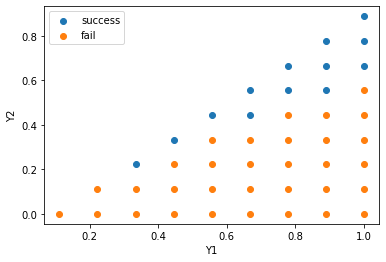

In [36]:
s_x = [0.3333333333333333,0.4444444444444444,0.5555555555555556,0.6666666666666666,0.6666666666666666,
       0.7777777777777777,0.7777777777777777,0.8888888888888888,0.8888888888888888,0.8888888888888888,1.0,1.0,1.0]

s_y = [0.2222222222222222,0.3333333333333333,0.4444444444444444,0.4444444444444444,0.5555555555555556,
       0.5555555555555556,0.6666666666666666,0.5555555555555556,0.6666666666666666,0.7777777777777777,
       0.6666666666666666,0.7777777777777777,0.8888888888888888]

f_x = [0.1111111111111111,0.2222222222222222,0.2222222222222222,0.3333333333333333,0.3333333333333333,
       0.4444444444444444,0.4444444444444444,0.4444444444444444,0.5555555555555556,0.5555555555555556,
       0.5555555555555556,0.5555555555555556,0.6666666666666666,0.6666666666666666,0.6666666666666666,
       0.6666666666666666,0.7777777777777777,0.7777777777777777,0.7777777777777777,0.7777777777777777,
       0.7777777777777777,0.8888888888888888,0.8888888888888888,0.8888888888888888,0.8888888888888888,
       0.8888888888888888,1.0,1.0,1.0,1.0,1.0,1.0]

f_y =[0.0,0.0,0.1111111111111111,0.0,0.1111111111111111,0.0,0.1111111111111111,0.2222222222222222,0.0,
      0.1111111111111111,0.2222222222222222,0.3333333333333333,0.0,0.1111111111111111,0.2222222222222222,
      0.3333333333333333,0.0,0.1111111111111111,0.2222222222222222,0.3333333333333333,0.4444444444444444,
      0.0,0.1111111111111111,0.2222222222222222,0.3333333333333333,0.4444444444444444,0.0,0.1111111111111111,
      0.2222222222222222,0.3333333333333333,0.4444444444444444,0.5555555555555556]

fig, ax = plt.subplots()
plt.scatter(s_x, s_y, label = "success")
plt.scatter(f_x, f_y, label = "fail")
plt.xlabel("Y1")
plt.ylabel("Y2")
ax.legend()
plt.show()

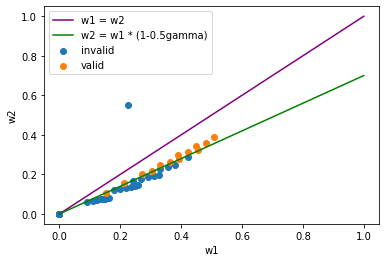

In [37]:
w_1 = [0.151595311435081, 0.211771732045292, 0.271276618041468, 0.303190622870160, 0.330487341891292, 
       0.363623768398186, 0.389542985674374, 0.393638945752752, 0.423543464090585, 0.448506854669007, 
       0.454785934305241, 0.483150598420370, 0.507411914128131]

w_2 = [0.108317577090751, 0.155837097979107, 0.202867773018413, 0.216635154181498, 0.249672657827568, 
       0.264336576516785, 0.296354681762182, 0.276766977443000, 0.311674195958215, 0.342962442729918, 
       0.324952731272249, 0.358782077957893, 0.389521886975164]

wx = [0.224760391961320, -0.000000000000000, 0.0892274735714846, -0.000000000000000, 0.109338122406855, 
      -0.000000000000000, 0.123885433909057, 0.178454947142969, -0.000000000000000, 0.134996752251636, 
      0.200359410584279, 0.241822541023841, -0.000000000000000, 0.143803023089691, 0.218676244813711, 
      0.267682420714452, -0.000000000000000, 0.150974619079918, 0.234281173377491, 0.290266535390024, 
      0.331518291181392, -0.000000000000000, 0.156938979676676, 0.247770867818120, 0.310219470307187, 
      0.356909894285934, -0.000000000000000, 0.161983522615945, 0.259570487577804, 0.328014367220566, 
      0.379851818897031, 0.421017477459300]

wy = [0.550757283713474, 0.000000000000000, 0.0593701182741974, 0.000000000000000, 0.0661354372508099, 
      0.000000000000000, 0.0704549978278374, 0.118740236548395, 0.000000000000000, 0.0735062759054677, 
      0.126371358765265, 0.168305473572365, 0.000000000000000, 0.0757980731997361, 0.132270874501620, 
      0.178110354822590, 0.000000000000000, 0.0775925625833458, 0.137005374179956, 0.186087475219426, 
      0.227954614914915, 0.000000000000000, 0.0790408555156268, 0.140909995655679, 0.192743494039314, 
      0.237480473096785, 0.000000000000000, 0.0802371125019130, 0.144197955439008, 0.198406311752430, 
      0.245644000654667, 0.287483742577077]


fig, ax = plt.subplots()
plt.xlabel("w1")
plt.ylabel("w2")
dat = np.linspace(0, 1, 100)
plt.plot(dat,dat, label = "w1 = w2", color = "purple")
plt.plot(dat, dat*(1-0.5*0.6), label = "w2 = w1 * (1-0.5gamma)", color = "green")
plt.scatter(wx, wy, label = "invalid")
plt.scatter(w_1, w_2, label = "valid")
ax.legend()
plt.show()

The equilibria are roughly clustered around $Y_1 = Y_2$ and the lower bounding line for $\gamma = 0.6$. Now, we use the $\gamma = 0.7$ data.

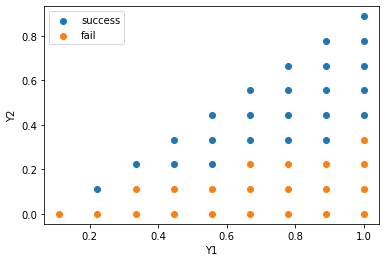

In [38]:
s_x = [0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 0.5555555555555556, 
       0.5555555555555556, 0.5555555555555556, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 
       0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 0.8888888888888888, 
       0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0]

s_y = [0.1111111111111111, 0.2222222222222222, 0.2222222222222222, 0.3333333333333333, 0.2222222222222222, 
       0.3333333333333333, 0.4444444444444444, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 
       0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.3333333333333333, 
       0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.4444444444444444, 
       0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888]

f_x = [0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.3333333333333333, 0.4444444444444444, 
       0.4444444444444444, 0.5555555555555556, 0.5555555555555556, 0.6666666666666666, 0.6666666666666666, 
       0.6666666666666666, 0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 0.8888888888888888, 
       0.8888888888888888, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0]

f_y = [0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.1111111111111111, 0.0, 0.1111111111111111, 0.0, 
       0.1111111111111111, 0.2222222222222222, 0.0, 0.1111111111111111, 0.2222222222222222, 0.0, 
       0.1111111111111111, 0.2222222222222222, 0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333]

fig, ax = plt.subplots()
plt.scatter(s_x, s_y, label = "success")
plt.scatter(f_x, f_y, label = "fail")
plt.xlabel("Y1")
plt.ylabel("Y2")
ax.legend()
plt.show()

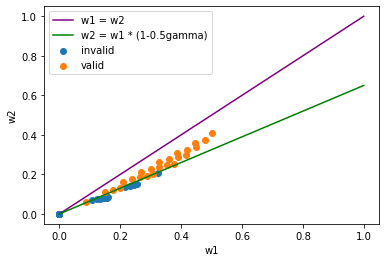

In [39]:
w_1 = [0.0881443189577422, 0.149896881465236, 0.176288637915484, 0.209516395890475, 0.197856077599378, 
       0.239014263527585, 0.268481995611892, 0.264432956873229, 0.299793762930473, 0.327161025029163, 
       0.286662452280150, 0.327614369329445, 0.359663221076596, 0.385688924074069, 0.306328561417902, 
       0.352577275830969, 0.389126333596690, 0.419032791780949, 0.444127361439521, 0.375155253152717, 
       0.416023163797366, 0.449690644395704, 0.478097984885514, 0.502508459196666]

w_2 = [0.0616710087373099, 0.112843221499371, 0.123342017474620, 0.162597627687654, 0.131067375363344, 
       0.175127533278419, 0.211866194206667, 0.185013026211932, 0.225686442998741, 0.260910126112766, 
       0.193082636959511, 0.237075569341574, 0.275621553028782, 0.309831726511970, 0.199837396531861, 
       0.246684034949240, 0.288113632845708, 0.325195255375307, 0.358679337410777, 0.254939024861880, 
       0.298904466895118, 0.338529664498105, 0.374540604221394, 0.407478785684490]

wx = [-0.000000000000000, -0.000000000000000, -0.000000000000000, 0.107963462062481, -0.000000000000000, 
      0.122353629977663, -0.000000000000000, 0.133380464083707, -0.000000000000000, 0.142144167281885, 
      0.215926924124961, -0.000000000000000, 0.149298411940266, 0.231350920427660, -0.000000000000000, 
      0.155260990989797, 0.244707259955327, -0.000000000000000, 0.160313493592421, 0.256408981160834, 
      0.323890386187441]

wy = [0.000000000000000, 0.000000000000000, 0.000000000000000, 0.0685338092917180, 0.000000000000000, 
      0.0729528647393487, 0.000000000000000, 0.0760953615526527, 0.000000000000000, 0.0784683711850516, 
      0.137067618583436, 0.000000000000000, 0.0803346582896225, 0.141903064298428, 0.000000000000000, 
      0.0818464726248047, 0.145905729478698, 0.000000000000000, 0.0830991342692275, 0.149287376825141, 
      0.205601427875153]

fig, ax = plt.subplots()
plt.xlabel("w1")
plt.ylabel("w2")
dat = np.linspace(0, 1, 100)
plt.plot(dat,dat, label = "w1 = w2", color = "purple")
plt.plot(dat, dat*(1-0.5*0.7), label = "w2 = w1 * (1-0.5gamma)", color = "green")
plt.scatter(wx, wy, label = "invalid")
plt.scatter(w_1, w_2, label = "valid")
ax.legend()
plt.show()

We have less clustering now and more of a transition towards the $w_1 = w_2$ line, as well as less closeness needed to achieve solutions in terms of $Y_1$ and $Y_2$. Lets try $\gamma = 0.8$.

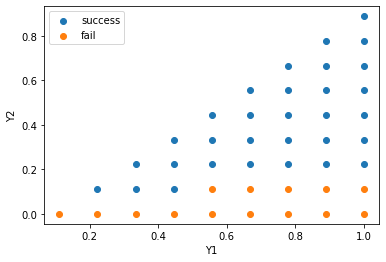

In [40]:
s_x = [0.2222222222222222, 0.3333333333333333, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 
       0.4444444444444444, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.6666666666666666, 
       0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.7777777777777777, 0.7777777777777777, 
       0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 0.8888888888888888, 0.8888888888888888, 
       0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0, 
       1.0, 1.0]

s_y = [0.1111111111111111, 0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.2222222222222222, 
       0.3333333333333333, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.2222222222222222, 
       0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.2222222222222222, 0.3333333333333333, 
       0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.2222222222222222, 0.3333333333333333, 
       0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.2222222222222222, 
       0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 
       0.8888888888888888]

f_x = [0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 
       0.5555555555555556, 0.6666666666666666, 0.6666666666666666, 0.7777777777777777, 0.7777777777777777, 
       0.8888888888888888, 0.8888888888888888, 1.0, 1.0]

f_y = [0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.1111111111111111, 0.0, 0.1111111111111111, 0.0, 
       0.1111111111111111, 0.0, 0.1111111111111111]

fig, ax = plt.subplots()
plt.scatter(s_x, s_y, label = "success")
plt.scatter(f_x, f_y, label = "fail")
plt.xlabel("Y1")
plt.ylabel("Y2")
ax.legend()
plt.show()

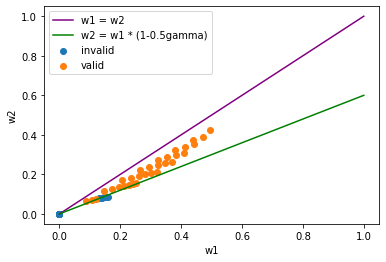

In [41]:
w_1 = [0.0868619902810355, 0.106389562010922, 0.147808480254429, 0.120627246443026, 0.173723980562066, 
       0.206684187236439, 0.194952551599084, 0.235615261775144, 0.264925128377938, 0.212779124021844, 
       0.260585970843074, 0.295616960508856, 0.322887850811427, 0.228026113341639, 0.282458264649409, 
       0.322919864779147, 0.354735281986277, 0.380703825207763, 0.241254492886053, 0.301837754329734, 
       0.347447961124086, 0.383632636514829, 0.413368374472875, 0.438432920789202, 0.252864717310549, 
       0.319168686032828, 0.369659004626294, 0.410038710723298, 0.443425440763325, 0.471706000325535, 
       0.496106326202965]

w_2 = [0.0640294551935767, 0.0710210982072672, 0.117448096891054, 0.0755647412629612, 0.128058910387148, 
       0.169459421746748, 0.135911636286009, 0.182086544245919, 0.220988598354673, 0.142042196414534, 
       0.192088365580693, 0.234896193782106, 0.272294758958958, 0.147005013644563, 0.200284197215264, 
       0.246391195314699, 0.287086827905481, 0.323479420872196, 0.151129482525922, 0.207169033348993, 
       0.256117820774243, 0.299676442209668, 0.338918843493492, 0.374590572010963, 0.154626343040860, 
       0.213063294621861, 0.264498298582048, 0.310577536231882, 0.352344290673212, 0.390524235866344, 
       0.425653858699334]

wx = [-0.000000000000000, -0.000000000000000, -0.000000000000000, -0.000000000000000, -0.000000000000000, 
      0.131576345550458, -0.000000000000000, 0.140305208561675, -0.000000000000000, 0.147450230195762, 
      -0.000000000000000, 0.153419231480118, -0.000000000000000, 0.158487784367858]

wy = [0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 
      0.0788190380711189, 0.000000000000000, 0.0812905844190794, 0.000000000000000, 0.0832435398129956, 
      0.000000000000000, 0.0848318293710513, 0.000000000000000, 0.0861523103992177]

fig, ax = plt.subplots()
plt.xlabel("w1")
plt.ylabel("w2")
dat = np.linspace(0, 1, 100)
plt.plot(dat,dat, label = "w1 = w2", color = "purple")
plt.plot(dat, dat*(1-0.5*0.8), label = "w2 = w1 * (1-0.5gamma)", color = "green")
plt.scatter(wx, wy, label = "invalid")
plt.scatter(w_1, w_2, label = "valid")
ax.legend()
plt.show()

It should be noted that so far, $w_1$ never exceeds 0.5. It should also be noted that at this point, we have further progression of both permissible dispersion between revenues and dispersion of equilibria given these revenues. Let's do $\gamma = 0.9$.

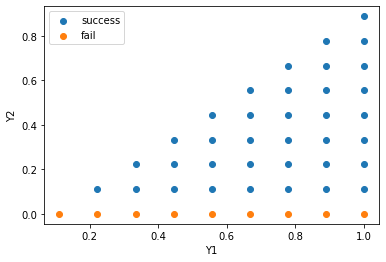

In [42]:
s_x = [0.2222222222222222, 0.3333333333333333, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 
       0.4444444444444444, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 
       0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 
       0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 
       0.7777777777777777, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 
       0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

s_y = [0.1111111111111111, 0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.2222222222222222, 
       0.3333333333333333, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 
       0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 
       0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 
       0.6666666666666666, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 
       0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.1111111111111111, 0.2222222222222222, 
       0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 
       0.8888888888888888]

f_x = [0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 
       0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]

f_y = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

fig, ax = plt.subplots()
plt.scatter(s_x, s_y, label = "success")
plt.scatter(f_x, f_y, label = "fail")
plt.xlabel("Y1")
plt.ylabel("Y2")
ax.legend()
plt.show()

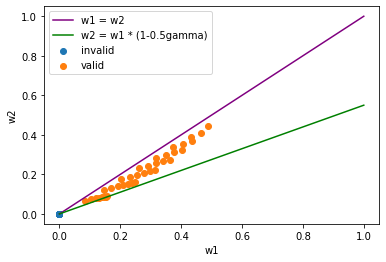

In [43]:
w_1 = [0.0853875239821329, 0.104624688725474, 0.145342115548972, 0.118715697243915, 0.170775047964293, 
       0.203291462918571, 0.129595069402548, 0.191664229282034, 0.231644807226951, 0.260626439184583, 
       0.138298178664028, 0.209249377450948, 0.256162571946408, 0.290684231097945, 0.317692160782677, 
       0.145443528760277, 0.224324409871415, 0.277676459698024, 0.317461175721238, 0.348868414251295, 
       0.374615863675822, 0.151428610890160, 0.237431394487830, 0.296770724482221, 0.341550095928567, 
       0.377189195676516, 0.406582925837140, 0.431455486374007, 0.156522766104953, 0.248957753696069, 
       0.313874066176431, 0.363392630213594, 0.403097600965001, 0.436026346646915, 0.464011473002730, 
       0.488241211681195]

w_2 = [0.0664659189787637, 0.0736224237344822, 0.122166291009462, 0.0783194102802813, 0.132931837957561, 
       0.176468962074955, 0.0817092793808274, 0.140950120996688, 0.189237530215720, 0.230293340162360, 
       0.0842995476174782, 0.147244847468964, 0.199397756936302, 0.244332582018925, 0.283896519174477, 
       0.0863566360818933, 0.152365274727430, 0.207758771862141, 0.255977175539690, 0.298813155023735, 
       0.337379183907581, 0.0880367220471112, 0.156638820560563, 0.214809600576657, 0.265863675915099, 
       0.311544639954626, 0.352937924149908, 0.390788926914569, 0.0894386071620361, 0.160275705003265, 
       0.220867271203456, 0.274408997751464, 0.322599202813941, 0.366498873028384, 0.406837897444951, 
       0.444151184499606]

wx = [-0.000000000000000, -0.000000000000000, -0.000000000000000, -0.000000000000000, -0.000000000000000, 
      -0.000000000000000, -0.000000000000000, -0.000000000000000, -0.000000000000000]

wy = [0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 
      0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000]


fig, ax = plt.subplots()
plt.xlabel("w1")
plt.ylabel("w2")
dat = np.linspace(0, 1, 100)
plt.plot(dat,dat, label = "w1 = w2", color = "purple")
plt.plot(dat, dat*(1-0.5*0.9), label = "w2 = w1 * (1-0.5gamma)", color = "green")
plt.scatter(wx, wy, label = "invalid")
plt.scatter(w_1, w_2, label = "valid")
ax.legend()
plt.show()

It should be noted that by this point, the only failing wages, resulting from failing revenue pairs, are those creating $w_1 = w_2 = 0$ which is technically an equilibrium but not one we're looking for. This means technically everything here is valid except possibly some very small edge cases.

We can thus predict that as $\gamma$ approaches 1, everything will be valid. To confirm this, let's try a value really close to 1, say, $0.9999$.

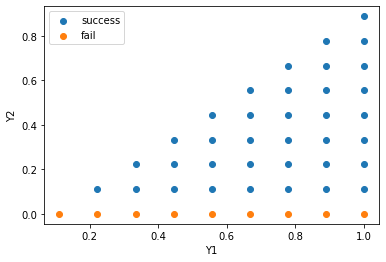

In [44]:
s_x = [0.2222222222222222, 0.3333333333333333, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 
       0.4444444444444444, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 
       0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 
       0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 0.7777777777777777, 
       0.7777777777777777, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 
       0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

s_y = [0.1111111111111111, 0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.2222222222222222, 
       0.3333333333333333, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 
       0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 
       0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 
       0.6666666666666666, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 
       0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.1111111111111111, 0.2222222222222222, 
       0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 
       0.8888888888888888]

f_x = [0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 
       0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]

f_y = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

fig, ax = plt.subplots()
plt.scatter(s_x, s_y, label = "success")
plt.scatter(f_x, f_y, label = "fail")
plt.xlabel("Y1")
plt.ylabel("Y2")
ax.legend()
plt.show()

$Y_2 = 0$ still doesn't show up as working, as we expect. But let's check the wages.

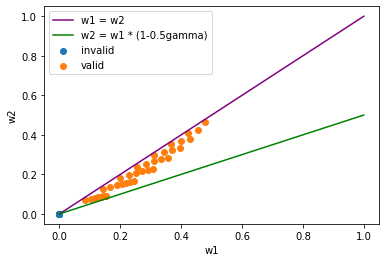

In [45]:
w_1 = [0.0837276810745483, 0.102676834105335, 0.142509520273139, 0.116628222343211, 0.167455362149094, 
       0.199354469397469, 0.127447271852364, 0.188005911936225, 0.227121557559494, 0.255606472040767, 
       0.136135236537378, 0.205353668210667, 0.251183043223652, 0.285019040546277, 0.311598682124799, 
       0.143292075830672, 0.220263007053648, 0.272338632561873, 0.311263784766069, 0.342090671738668, 
       0.367453882599382, 0.149304557042457, 0.233256444686415, 0.291150267322410, 0.334910724298189, 
       0.369826447177104, 0.398708938794931, 0.423227974534394, 0.154435547890943, 0.244707930217842, 
       0.308030502316005, 0.356384507077264, 0.395232111867987, 0.427528560819415, 0.455051230888267, 
       0.478950076405450]

w_2 = [0.0690017331709650, 0.0763642820607189, 0.127033477303228, 0.0812476456273832, 0.138003466341927, 
       0.183675222905461, 0.0848006713867393, 0.146231000063307, 0.196637895090951, 0.239842245991191, 
       0.0875333109191425, 0.152728564121435, 0.207005199512904, 0.254066954606452, 0.295789854113926, 
       0.0897151701406851, 0.158041259758540, 0.215576012425413, 0.265912411951208, 0.310885339457190,
       0.351617949951727, 0.0915052928574207, 0.162495291254760, 0.222833849840888, 0.276006932683854, 
       0.323811406825767, 0.367350445810910, 0.407373738993194, 0.0930048613809527, 0.166300919294769,
       0.229092846182157, 0.284762189993787, 0.335069791888980, 0.381100431909678, 0.423592465938742, 
       0.463082445920637]

wx = [-0.000000000000000, -0.000000000000000, -0.000000000000000, -0.000000000000000, -0.000000000000000, 
      -0.000000000000000, -0.000000000000000, -0.000000000000000, -0.000000000000000]

wy = [0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000, 
      0.000000000000000, 0.000000000000000, 0.000000000000000, 0.000000000000000]

fig, ax = plt.subplots()
plt.xlabel("w1")
plt.ylabel("w2")
dat = np.linspace(0, 1, 100)
plt.plot(dat,dat, label = "w1 = w2", color = "purple")
plt.plot(dat, dat*(1-0.5*0.9999), label = "w2 = w1 * (1-0.5gamma)", color = "green")
plt.scatter(wx, wy, label = "invalid")
plt.scatter(w_1, w_2, label = "valid")
ax.legend()
plt.show()

Observe that as $\gamma$ approaches 1, the equilibria all approach the $w_1 = w_2$ line, although not all sit at the line specifically.

Counting dots on the right hand side of the revenue comparison charts, 0.6 had 3 dots, 0.7 has 5 dots, 0.8 had 7 dots, 0.9 had 8 dots, so we can guess that the success-fail line becomes lower close to linearly but perhaps not exactly linearly as $\gamma$ increases. 

Because of the apparent linearity of the valid-invalid line between $Y_1$ and $Y_2$, we can assume this also works as the revenues increase past 1.

This leads to the following final conclusion:

In the Incomplete Information Directed Search model, as proven by the above analysis, if:

- $Y_1 > Y_2$,
- $\lambda$ is sufficiently high such that $\pi_L = 0$ always,
- we assume $w_1 = w_2 = 0$ is not a relevant equilibrium and therefore not defined as one,

then if an equilibrium in wages does exist, it will satisfy $w_1 > w_2$ and $\frac{\lambda}{2}w_1 + (1-\lambda)w_1 \leq w_2$ if and only if:

- $Y_2$ is "sufficiently close" to $Y_1$ given $\lambda$
  - the exact level of closeness is approximately linear in revenues, at least for $Y_1 \leq 1$, decreasing in $Y_1$
  - the level of closeness for all $Y_1$ is decreasing in $\lambda$ and becomes unbounded as $\lambda$ approaches 1
  - the exact function that describes this closeness can be linearly interpolated, which is left as an exercise to the reader
  
otherwise, if an equilibrium exists, it is outside this region where $\pi_L = 0$, and

if $\pi_L \neq 0$, if there happens to be any equilibrium, it will be strictly outside this region which is out of the scope of the problem.

QED